In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from dateutil import parser
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [2]:
merged_data = pd.read_csv('merged_data.csv')

In [3]:
print(merged_data)

            Date  tempmax  tempmin  temp  humidity    prcp    Minimum  \
0     01-06-2013     26.1     20.2  22.6      89.0  20.000  21.272727   
1     02-06-2013     27.0     20.1  22.8      84.7   5.000  21.272727   
2     03-06-2013     27.1     19.9  22.5      83.3   4.000  21.272727   
3     04-06-2013     28.6     19.9  24.0      75.9   0.000  21.272727   
4     05-06-2013     30.0     21.0  25.2      73.1   0.000  21.272727   
...          ...      ...      ...   ...       ...     ...        ...   
3832  28-11-2023     27.9     20.4  23.7      80.3   0.200  15.000000   
3833  29-11-2023     27.9     21.1  23.7      80.8   0.019   5.000000   
3834  30-11-2023     28.9     20.1  23.4      80.8   0.100  15.000000   
3835  01-12-2023     27.8     20.1  23.6      80.5   0.013  28.000000   
3836  02-12-2023     27.8     19.2  23.2      80.5   0.700  20.000000   

      Maximum    Average  
0        26.0  23.636364  
1        26.0  23.636364  
2        26.0  23.636364  
3        26.0  

In [4]:
date = merged_data['Date']
precipitation = merged_data[' prcp']
price = merged_data['Average']

In [5]:

merged_data['Date'] = pd.to_datetime(merged_data['Date'])

<ipython-input-5-ead1b8c69bc7>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged_data['Date'] = pd.to_datetime(merged_data['Date'])


In [6]:
features = merged_data[[' prcp', 'tempmin', 'tempmax', 'temp', 'humidity', 'Maximum', 'Minimum']]
target = merged_data['Average']

In [7]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [10]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
96/96 [==============================] - 4s 14ms/step - loss: 1703.7694 - val_loss: 1699.3617
Epoch 2/50
96/96 [==============================] - 1s 6ms/step - loss: 1509.4578 - val_loss: 1360.3405
Epoch 3/50
96/96 [==============================] - 1s 13ms/step - loss: 1078.5747 - val_loss: 823.7129
Epoch 4/50
96/96 [==============================] - 1s 14ms/step - loss: 627.2474 - val_loss: 436.6954
Epoch 5/50
96/96 [==============================] - 1s 13ms/step - loss: 389.9004 - val_loss: 296.6134
Epoch 6/50
96/96 [==============================] - 1s 13ms/step - loss: 326.7672 - val_loss: 265.7034
Epoch 7/50
96/96 [==============================] - 1s 7ms/step - loss: 311.5755 - val_loss: 252.9646
Epoch 8/50
96/96 [==============================] - 1s 7ms/step - loss: 298.6638 - val_loss: 237.7686
Epoch 9/50
96/96 [==============================] - 1s 8ms/step - loss: 281.9824 - val_loss: 220.2904
Epoch 10/50
96/96 [==============================] - 1s 7ms/step - loss:

In [12]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

In [13]:
print(f'Training Loss: {train_loss:.4f}')
print(f'Testing Loss: {test_loss:.4f}')

Training Loss: 41.9778
Testing Loss: 3.6228


In [14]:
predictions = model.predict(X_test)

24/24 [==============================] - 0s 3ms/step


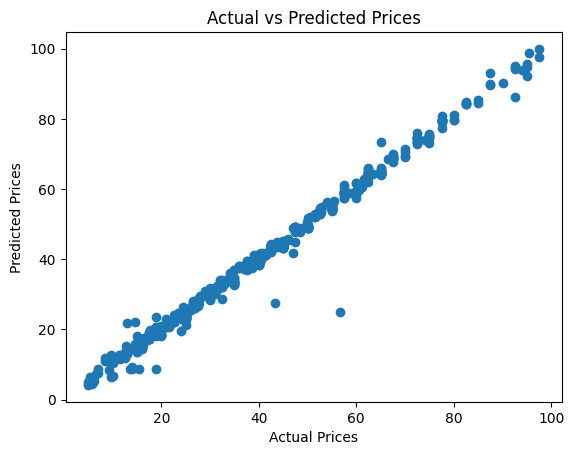

In [15]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [16]:
import math
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'RMSE: {math.sqrt(mse)}')

Mean Squared Error: 3.6228460589417857
RMSE: 1.9033775397807409


In [17]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)

R-squared: 0.9896709517916995


In [19]:
future_data = pd.DataFrame({
    ' prcp': [0.1, 0.013, 0.7],  # Example precipitation values for future dates
    'tempmin': [20.1, 20.1, 19.2],   # Example minimum temperature values for future dates
    'tempmax': [28.9, 27.8, 27.8],   # Example maximum temperature values for future dates
    'temp': [23.4, 23.6, 23.2],      # Example temperature values for future dates
    'humidity': [80.8, 80.5, 80.5],  # Example humidity values for future dates
    'Maximum': [33, 30, 30], # Example maximum price values for future dates
    'Minimum': [15, 28, 20]
})

In [20]:
future_data_scaled = scaler.transform(future_data)

# Reshape future data to match the model's input shape
future_data_reshaped = np.reshape(future_data_scaled, (future_data_scaled.shape[0], 1, future_data_scaled.shape[1]))

# Make predictions for future dates using the trained model
future_predictions = model.predict(future_data_reshaped)

# Create a DataFrame with the future dates and corresponding predictions
future_dates = pd.date_range(start='2023-11-30', end='2023-12-02')  # Example future dates
future_predictions_df = pd.DataFrame({'Date': future_dates, 'Predicted_Price': future_predictions.flatten()})

# Display the predictions for future dates
print(future_predictions_df)

1/1 [==============================] - 1s 864ms/step
        Date  Predicted_Price
0 2023-11-30        19.508572
1 2023-12-01        30.607710
2 2023-12-02        23.363487
